# YOLOv11 Object Detection w/ Inference Server
This notebook contains code to start the inference server and test out the trained YOLOv11 model on various test images for object detection.

In [13]:
import docker
import subprocess
import getpass

# Define the Docker image and container details
image_name = "mkr2497/robotic-arm-nlp:latest"
container_name = "yolov11-inference-server"
host_port = 5000
container_port = 5000

# Use for running Docker commands
def run_as_sudo(command):
    """
    Runs a shell command with sudo privileges.
    """
    try:
        password = getpass.getpass("Enter your sudo password: ")
        sudo_command = f"echo {password} | sudo -S {command}"
        subprocess.run(sudo_command, shell=True, check=True, \
            executable="/bin/bash")
    except subprocess.CalledProcessError as e:
        print(f"Error running command '{command}': {e}")
        raise

try:
    # Pull the Docker image
    # print(f"Pulling Docker image: {image_name}")
    # run_as_sudo(f"docker pull {image_name}")
    # print("Image pulled successfully.")

    # Run the Docker container
    print(f"Starting container: {container_name}")
    run_as_sudo(f"docker run -it -d --name {container_name} -p \
        {host_port}:{container_port} {image_name}")
    print(f"Container '{container_name}' is running on port {host_port}.")
except Exception as e:
    print(f"An error occurred: {e}")

Starting container: yolov11-inference-server
8c6716509504ef5a4edc574a00f5463bc5127ecb3d052a98c1d5d53c0b2e70da
Container 'yolov11-inference-server' is running on port 5000.


[sudo] password for jacob: 

In [14]:
import requests
import json

try:
    # Send a GET request for YOLOv11 bottle model and print the response
    server_url = f"http://localhost:{host_port}/models/yolov11/bottles/v1"
    response = requests.get(server_url)
    if response.status_code == 200:
        print("Response from server:")
        print(json.dumps(response.json(), indent=2))
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")
        print("Response text:", json.dumps(response.json(), indent=2))
except requests.exceptions.RequestException as e:
    print(f"An error occurred while sending the GET request: {e}")

Response from server:
{
  "architecture": {
    "backbone": [
      [
        -1,
        1,
        "Conv",
        [
          64,
          3,
          2
        ]
      ],
      [
        -1,
        1,
        "Conv",
        [
          128,
          3,
          2
        ]
      ],
      [
        -1,
        2,
        "C3k2",
        [
          256,
          false,
          0.25
        ]
      ],
      [
        -1,
        1,
        "Conv",
        [
          256,
          3,
          2
        ]
      ],
      [
        -1,
        2,
        "C3k2",
        [
          512,
          false,
          0.25
        ]
      ],
      [
        -1,
        1,
        "Conv",
        [
          512,
          3,
          2
        ]
      ],
      [
        -1,
        2,
        "C3k2",
        [
          512,
          true
        ]
      ],
      [
        -1,
        1,
        "Conv",
        [
          1024,
          3,
          2
        ]
      ],
      

Selected image for testing: ../data/coco_data-split/test/images/000000541898.jpg


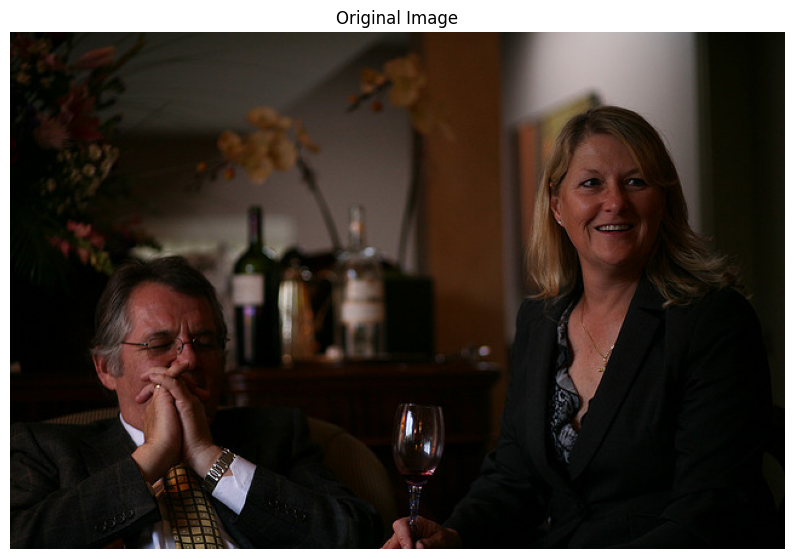

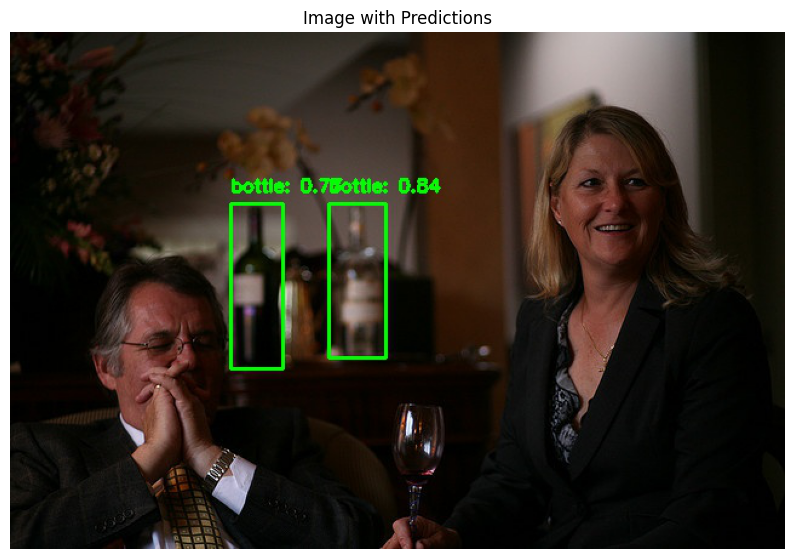

In [15]:
import os
import random
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Define the path to the image directory and select a random image to test
data_dir = '../data/coco_data'
image_path = f'{data_dir}-split/test/images'
images = [f for f in os.listdir(image_path) if f.endswith('.jpg')]
image_name = os.path.join(image_path, random.choice(images))
print(f"Selected image for testing: {image_name}")

try:
    # Display the original image
    original_image = Image.open(image_name)
    plt.figure(figsize=(10, 10))
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")
    plt.show()
    
    # Send a POST request to the server with the image
    with open(image_name, 'rb') as image_file:
        files = {'image': image_file}
        response = requests.post(server_url, files=files)
        if response.status_code == 200:
            # Load the returned image
            predicted_image = Image.open(BytesIO(response.content))
            
            # Display the image with predictions
            plt.figure(figsize=(10, 10))
            plt.imshow(predicted_image)
            plt.title("Image with Predictions")
            plt.axis("off")
            plt.show()
        else:
            print(f"Failed to send image. Status code: {response.status_code}")
            print("Response text:", json.dumps(response.json(), indent=2))
except requests.exceptions.RequestException as e:
    print(f"An error occurred while sending the POST request: {e}")

In [16]:
try:
    # Send a GET request for YOLOv11 candy model and print the response
    server_url = f"http://localhost:{host_port}/models/yolov11/candy/v1"
    response = requests.get(server_url)
    if response.status_code == 200:
        print("Response from server:")
        print(json.dumps(response.json(), indent=2))
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")
        print("Response text:", json.dumps(response.json(), indent=2))
except requests.exceptions.RequestException as e:
    print(f"An error occurred while sending the GET request: {e}")

Response from server:
{
  "architecture": {
    "backbone": [
      [
        -1,
        1,
        "Conv",
        [
          64,
          3,
          2
        ]
      ],
      [
        -1,
        1,
        "Conv",
        [
          128,
          3,
          2
        ]
      ],
      [
        -1,
        2,
        "C3k2",
        [
          256,
          false,
          0.25
        ]
      ],
      [
        -1,
        1,
        "Conv",
        [
          256,
          3,
          2
        ]
      ],
      [
        -1,
        2,
        "C3k2",
        [
          512,
          false,
          0.25
        ]
      ],
      [
        -1,
        1,
        "Conv",
        [
          512,
          3,
          2
        ]
      ],
      [
        -1,
        2,
        "C3k2",
        [
          512,
          true
        ]
      ],
      [
        -1,
        1,
        "Conv",
        [
          1024,
          3,
          2
        ]
      ],
      

Selected image for testing: ../data/candy_data_06JAN25-split/test/images/c32d7e35-candy_119.jpg


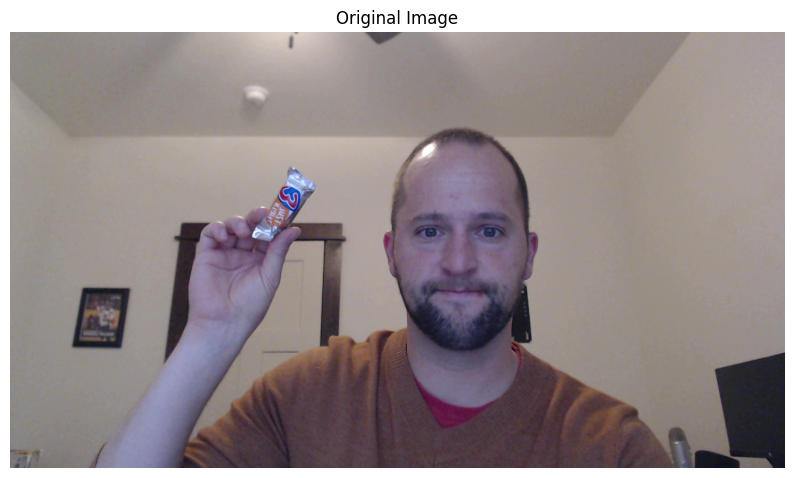

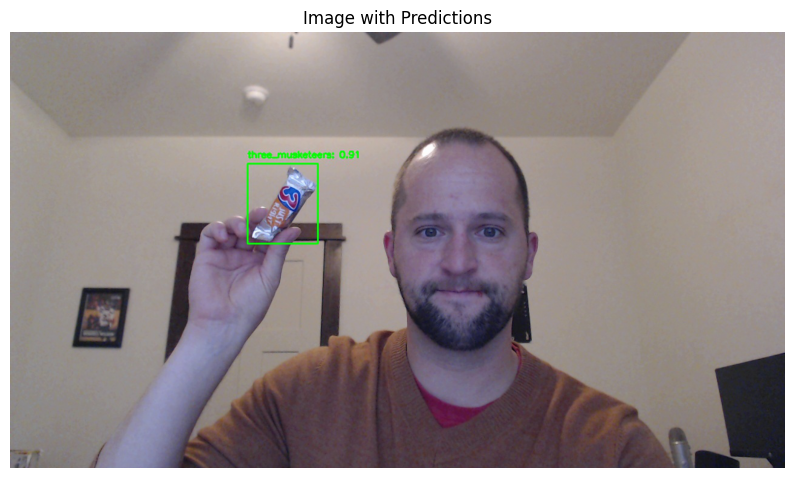

In [17]:
# Define the path to the image directory and select a random image to test
data_dir = '../data/candy_data_06JAN25'
image_path = f'{data_dir}-split/test/images'
images = [f for f in os.listdir(image_path) if f.endswith('.jpg')]
image_name = os.path.join(image_path, random.choice(images))
print(f"Selected image for testing: {image_name}")

try:
    # Display the original image
    original_image = Image.open(image_name)
    plt.figure(figsize=(10, 10))
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")
    plt.show()
    
    # Send a POST request to the server with the image
    with open(image_name, 'rb') as image_file:
        files = {'image': image_file}
        response = requests.post(server_url, files=files)
        if response.status_code == 200:
            # Load the returned image
            predicted_image = Image.open(BytesIO(response.content))
            
            # Display the image with predictions
            plt.figure(figsize=(10, 10))
            plt.imshow(predicted_image)
            plt.title("Image with Predictions")
            plt.axis("off")
            plt.show()
        else:
            print(f"Failed to send image. Status code: {response.status_code}")
            print("Response text:", json.dumps(response.json(), indent=2))
except requests.exceptions.RequestException as e:
    print(f"An error occurred while sending the POST request: {e}")

In [18]:
try:
    # Send a GET request for YOLOv11 coin model and print the response
    server_url = f"http://localhost:{host_port}/models/yolov11/coins/v1"
    response = requests.get(server_url)
    if response.status_code == 200:
        print("Response from server:")
        print(json.dumps(response.json(), indent=2))
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")
        print("Response text:", json.dumps(response.json(), indent=2))
except requests.exceptions.RequestException as e:
    print(f"An error occurred while sending the GET request: {e}")

Response from server:
{
  "architecture": {
    "backbone": [
      [
        -1,
        1,
        "Conv",
        [
          64,
          3,
          2
        ]
      ],
      [
        -1,
        1,
        "Conv",
        [
          128,
          3,
          2
        ]
      ],
      [
        -1,
        2,
        "C3k2",
        [
          256,
          false,
          0.25
        ]
      ],
      [
        -1,
        1,
        "Conv",
        [
          256,
          3,
          2
        ]
      ],
      [
        -1,
        2,
        "C3k2",
        [
          512,
          false,
          0.25
        ]
      ],
      [
        -1,
        1,
        "Conv",
        [
          512,
          3,
          2
        ]
      ],
      [
        -1,
        2,
        "C3k2",
        [
          512,
          true
        ]
      ],
      [
        -1,
        1,
        "Conv",
        [
          1024,
          3,
          2
        ]
      ],
      

Selected image for testing: ../data/YOLO_coin_data_12DEC30-split/test/images/Pics6_43.jpg


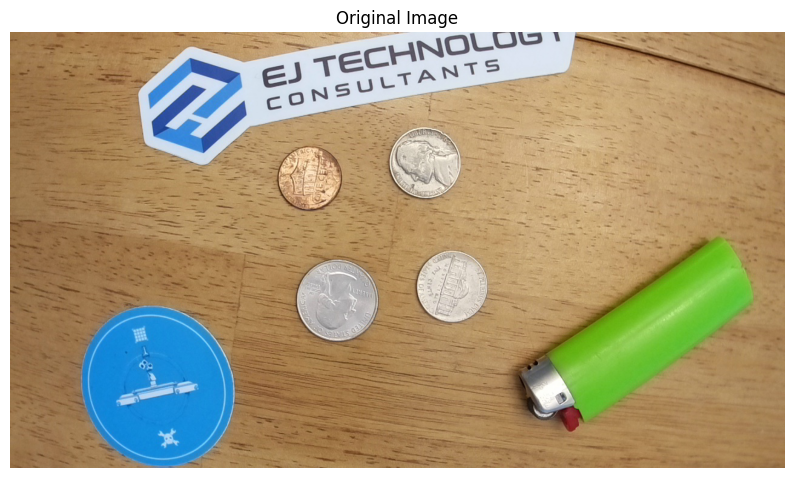

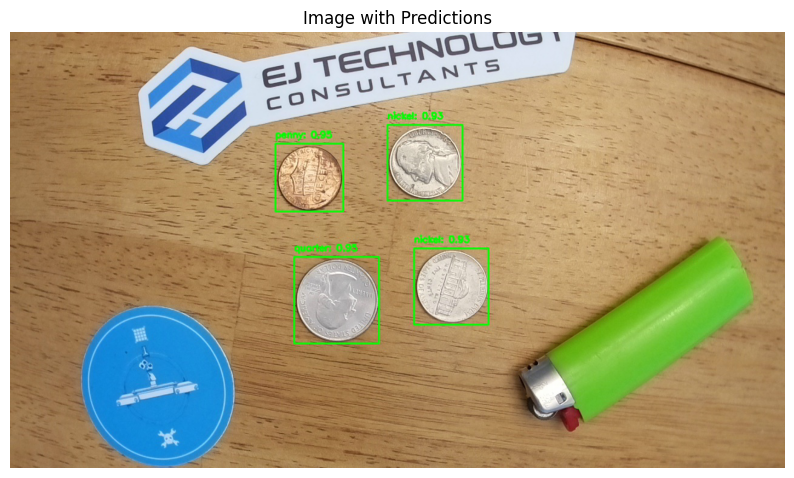

In [19]:
# Define the path to the image directory and select a random image to test
data_dir = '../data/YOLO_coin_data_12DEC30'
image_path = f'{data_dir}-split/test/images'
images = [f for f in os.listdir(image_path) if f.endswith('.jpg')]
image_name = os.path.join(image_path, random.choice(images))
print(f"Selected image for testing: {image_name}")

try:
    # Display the original image
    original_image = Image.open(image_name)
    plt.figure(figsize=(10, 10))
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")
    plt.show()
    
    # Send a POST request to the server with the image
    with open(image_name, 'rb') as image_file:
        files = {'image': image_file}
        response = requests.post(server_url, files=files)
        if response.status_code == 200:
            # Load the returned image
            predicted_image = Image.open(BytesIO(response.content))
            
            # Display the image with predictions
            plt.figure(figsize=(10, 10))
            plt.imshow(predicted_image)
            plt.title("Image with Predictions")
            plt.axis("off")
            plt.show()
        else:
            print(f"Failed to send image. Status code: {response.status_code}")
            print("Response text:", json.dumps(response.json(), indent=2))
except requests.exceptions.RequestException as e:
    print(f"An error occurred while sending the POST request: {e}")